In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os
from matplotlib.ticker import FormatStrFormatter



In [89]:
from matplotlib import style
style.use('default')

In [90]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
zet = Symbol('zeta')
kalpha = Symbol('K_alpha')

In [91]:
pc_kpc = 1e3		#number of pc in one kpc
cm_km = 1e5		#number of cm in one km
s_day = 24*3600		#number of seconds in one day
s_min = 60		#number of seconds in one hour
s_hr = 3600		#number of seconds in one hour
cm_Rsun = 6.957e10	#solar radius in cm
g_Msun = 1.989e33	#solar mass in g
cgs_G = 6.674e-8 
cms_c = 2.998e10
g_mH = 1.6736e-24
g_me = 9.10938e-28
cgs_h = 6.626e-27
deg_rad = 180e0/np.pi
arcmin_deg = 60e0
arcsec_deg = 3600e0

kpc_D_M31_Plot = 780e0  #distance to M31 used for plots (see Beck+2019)

kpc_D_M31_Chemin = 785e0  #distance to M31 used by Chemin+2009
kpc_D_M31_TB10 = 780e0  #distance to M31 used by Tabatabaei+Berkhuijsen 2010
kpc_D_M31_Fletcher = 690e0  #distance to M31 used by Fletcher+2004
kpc_rmax_M31 = 46
kpc_xbnd_M31_Fletcher = np.array([6,8,10,12,14])	#radial bins for magnetic field data (Fletcher+04)
kpc_xmid_M31_Fletcher = np.array([7,9,11,13])	#midpoints of radial bins for magnetic field data (Fletcher+04)

kpc_xbnd_M31 = kpc_xbnd_M31_Fletcher * kpc_D_M31_Plot / kpc_D_M31_Fletcher
kpc_xmid_M31 = kpc_xmid_M31_Fletcher * kpc_D_M31_Plot / kpc_D_M31_Fletcher

arcmin_xbnd_M31 = kpc_xbnd_M31 / kpc_D_M31_Plot * deg_rad * arcmin_deg
arcmin_xmid_M31 = kpc_xmid_M31 / kpc_D_M31_Plot * deg_rad * arcmin_deg

print('arcmin_xbnd_M31',arcmin_xbnd_M31)
print('arcmin_xmid_M31',arcmin_xmid_M31)

length, breadth = [5, 2.5]

#Specifiy text size in legend
leg_textsize = 10
axis_textsize = 10
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]


### M31

##HI data from Claude Carignan (private communication--see data.pdf for additional info. 

#Reference: Chemin+2009 (ApJ, 705, 1395)
#Distance to M31 assumed in that paper: 785 +/- 25 kpc
#velocity dispersion data copied from m31_HIdata_velocdisp.txt 
#Circular velocity data copied from model2c copie.dat

# Radius for velocity dispersion data (from m31_HIdata_velocdisp.txt)
arcsec_r = np.array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

# Radius from Chemin+2009 (Tab. 4)
arcmin_r_Chemin = np.array([1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 11.67, 13.33, 15.00, 16.67, 18.33, 20.00, 21.67, 23.33, 25.00, 26.67, 28.33, 30.00, 31.67, 33.33, 35.00, 36.67, 38.33, 40.00, 41.67, 43.33, 45.00, 46.67, 48.33, 50.00, 51.67, 53.33, 55.00, 56.67, 58.33, 60.00, 61.67, 63.33, 65.00, 66.67, 68.33, 70.00, 71.67, 73.33, 75.00, 76.67, 78.33, 80.00, 81.67, 83.33, 85.00, 86.67, 88.33, 90.00, 91.67, 93.33, 95.00, 96.67, 98.33, 100.00, 101.67, 103.33, 105.00, 106.67, 108.33, 110.00, 111.67, 113.33, 115.00, 116.67, 118.33, 120.00, 121.67, 123.33, 125.00, 126.67, 128.33, 130.00, 131.67, 133.33, 135.00, 136.67, 138.33, 140.00, 141.67, 143.33, 145.00, 146.67, 148.33, 150.00, 151.67, 153.33, 155.00, 156.67, 158.33, 160.00, 161.67, 163.33, 165.00, 166.67])

# Vcirc from Chemin+2009 (Tab. 4)
kms_vcirc_Chemin = np.array([0, 0, 336.2, 324.6, 339.0, 243.6, 235.2, 238.9, 239.3, 226.3, 202.6, 207.3, 202.5, 208.9, 221.6, 232.2, 237.6, 239.8, 235.6, 241.7, 244.3, 248.8, 251.8, 253.0, 258.8, 259.0, 262.2, 266.8, 266.8, 265.9, 264.4, 264.7, 265.3, 265.2, 262.0, 260.8, 259.2, 258.1, 258.4, 259.2, 262.7, 266.1, 270.0, 269.8, 269.1, 268.5, 263.0, 257.1, 254.1, 251.9, 249.5, 245.7, 243.7, 245.9, 242.3, 239.2, 239.5, 236.1, 233.8, 233.1, 230.1, 232.1, 228.7, 229.1, 227.9, 226.9, 225.1, 225.4, 230.3, 229.0, 229.9, 230.1, 229.8, 230.4, 230.9, 229.8, 228.8, 238.3, 243.6, 247.3, 247.8, 248.4, 248.1, 244.5, 244.4, 241.7, 237.7, 237.6, 244.9, 247.9, 256.3, 253.5, 244.3, 249.3, 255.7, 255.0, 271.1, 269.8, 258.2, 275.1])

# Vcirc_error from Chemin+2009 (Tab. 4)
kms_vcirc_error_Chemin = np.array([0, 0, 171.7, 125.1, 52.8, 25.8, 17.0, 5.7, 18.3, 16.1, 4.7, 10.7, 21.7, 15.6, 13.4, 13.7, 8.3, 2.2, 6.1, 3.3, 6.4, 6.4, 5.5, 9.2, 9.6, 9.5, 10.8, 13.0, 11.7, 9.9, 7.2, 5.3, 5.4, 3.9, 2.4, 4.5, 5.4, 6.8, 6.1, 4.6, 4.2, 4.0, 2.3, 1.0, 3.9, 7.1, 15.0, 13.5, 10.6, 11.1, 8.1, 7.4, 6.6, 7.5, 6.1, 6.3, 4.7, 1.8, 1.7, 3.3, 5.5, 5.0, 1.7, 1.8, 5.0, 2.0, 1.6, 1.8, 2.0, 2.3, 4.8, 6.6, 3.0, 5.2, 2.9, 2.1, 1.8, 3.3, 1.4, 3.1, 1.3, 2.0, 1.5, 1.6, 3.0, 4.3, 1.9, 6.1, 3.6, 3.2, 3.1, 4.1, 4.7, 5.8, 4.5, 5.8, 7.8, 4.7, 10.7, 4.8])

# HI surface density from Chemin+2009 (Tab. 4)
Msunpc2_SigmaHI_Chemin = np.array([2.77, 3.19, 4.21, 3.94, 4.49, 2.14, 1.52, 1.51, 1.57, 2.21, 3.00, 3.54, 2.75, 2.31, 2.09, 1.86, 1.41, 1.43, 1.60, 2.07, 2.84, 3.85, 4.61, 4.39, 3.78, 3.34, 3.16, 3.37, 4.34, 5.02, 4.95, 4.45, 4.03, 3.98, 3.91, 3.67, 3.39, 3.37, 3.01, 2.61, 2.39, 2.00, 1.92, 1.79, 2.21, 1.91, 1.74, 1.60, 1.44, 1.35, 1.24, 1.15, 1.18, 1.10, 1.08, 0.83, 0.75, 0.76, 0.88, 0.82, 0.75, 0.67, 0.58, 0.49, 0.43, 0.42, 0.45, 0.46, 0.42, 0.39, 0.38, 0.29, 0.23, 0.20, 0.21, 0.17, 0.10, 0.08, 0.07, 0.07, 0.10, 0.08, 0.07, 0.06, 0.06, 0.06, 0.02, 0.01, 0.01, 0.01, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.02])

# HI velocity dispersion: sigma_los using model WITHOUT warp (C. Carignan, private communication; Claude suggested I should use this model)
kms_sigmaLOS = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82, 11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])

# HI velocity dispersion: sigma_los using model WITH warp (C. Carignan, private communication)
kms_sigmaLOS_warp = np.array([12.05, 15.64, 15.70, 10.75, 8.71, 5.82, 6.08, 8.23, 9.48, 11.61, 13.61, 12.37, 7.77, 6.22, 5.98, 5.38, 5.47, 6.62, 8.16, 8.31, 8.67, 9.30, 9.67, 8.51, 7.51, 6.32, 6.13, 6.52, 9.29, 10.66, 11.48, 10.77, 10.61, 11.23, 12.05, 11.80, 11.42, 10.91, 8.56, 6.32, 5.45, 4.81, 5.43, 6.68, 10.43, 10.71, 10.95, 10.25, 9.16, 8.87, 9.05, 8.72, 8.98, 8.49, 9.61, 6.84, 6.16, 6.88, 9.87, 9.87, 9.85, 8.62, 7.97, 7.54, 7.19, 7.99, 8.30, 8.56, 7.14, 7.23, 7.85, 7.05, 7.49, 6.64, 8.34, 7.07, 5.53, 5.61, 4.06, 4.75, 8.15, 7.09, 5.89, 6.24, 5.59, 5.59, 4.49, 3.81, 2.61, 3.57, 4.67, 5.37, 6.67, 4.19, 5.09, 4.45, 4.40, 4.53, 5.62, 5.20])

# Radius for circular velocity and surface density data (from model2c copie.dat) -- assumes distance of 785 kpc
kpc_r_Claude = np.array([0.00, 0.48, 0.96, 1.44, 1.92, 2.40, 2.88, 3.36, 3.84, 4.32, 4.80, 5.28, 5.76, 6.24, 6.72, 7.20, 7.68, 8.16, 8.64, 9.12, 9.60, 10.08, 10.56, 11.04, 11.52, 12.00, 12.48, 12.96, 13.44, 13.92, 14.40, 14.88, 15.36, 15.84, 16.32, 16.80, 17.28, 17.76, 18.24, 18.72, 19.20, 19.68, 20.16, 20.64, 21.12, 21.60, 22.08, 22.56, 23.04, 23.52, 24.00, 24.48, 24.96, 25.44, 25.92, 26.40, 26.88, 27.36, 27.84, 28.32, 28.80, 29.28, 29.76, 30.24, 30.72, 31.20, 31.68, 32.16, 32.64, 33.12, 33.60, 34.08, 34.56, 35.04, 35.52, 36.00, 36.48, 36.96, 37.44, 37.92, 38.40, 38.88, 39.36, 39.84, 40.32, 40.80, 41.28, 41.76, 42.24, 42.72, 43.20, 43.68, 44.16, 44.64, 45.12, 45.60])

# Circular velocity (from the VEL. TOTAL column of model2c copie.dat, which seems to be a smoothed version of the entries in Tab. 4 of Chemin+09?)
kms_vcirc = np.array([0.00, 150.97, 221.65, 247.13, 252.51, 253.89, 252.25, 251.54, 251.64, 252.07, 250.78, 246.00, 240.36, 236.65, 235.64, 235.92, 235.76, 233.72, 230.73, 229.63, 228.34, 228.24, 230.80, 233.99, 236.79, 238.75, 239.80, 240.51, 241.17, 241.85, 242.65, 244.03, 245.74, 247.20, 247.87, 247.59, 246.79, 245.90, 245.12, 244.22, 243.14, 242.09, 241.13, 240.15, 239.12, 238.18, 237.41, 236.67, 235.80, 234.78, 233.72, 232.66, 231.61, 230.55, 229.56, 228.63, 227.70, 226.84, 226.10, 225.41, 224.72, 224.02, 223.31, 222.62, 221.94, 221.28, 220.64, 220.02, 219.42, 218.84, 218.28, 217.74, 217.22, 216.72, 216.24, 215.79, 215.36, 214.95, 214.55, 214.19, 213.84, 213.51, 213.22, 212.93, 212.67, 212.43, 212.20, 212.00, 211.82, 211.66, 211.53, 211.42, 211.32, 211.19, 211.05, 210.85])

# HI surface density of disc (from model2c copie.dat column HI S.D.)
Msunpc2_SigmaHI = np.array([0.1212E-02, 0.1975E+00, 0.3949E+00, 0.5924E+00, 0.7899E+00, 0.9873E+00, 0.1185E+01, 0.1382E+01, 0.1596E+01, 0.1816E+01, 0.2046E+01, 0.2282E+01, 0.2491E+01, 0.2678E+01, 0.2797E+01, 0.2836E+01, 0.2960E+01, 0.3228E+01, 0.3525E+01, 0.3895E+01, 0.4232E+01, 0.4438E+01, 0.4621E+01, 0.4700E+01, 0.4771E+01, 0.4829E+01, 0.4886E+01, 0.4926E+01, 0.4960E+01, 0.4721E+01, 0.4424E+01, 0.3954E+01, 0.3421E+01, 0.2932E+01, 0.2467E+01, 0.2110E+01, 0.1831E+01, 0.1661E+01, 0.1583E+01, 0.1537E+01, 0.1526E+01, 0.1506E+01, 0.1468E+01, 0.1429E+01, 0.1391E+01, 0.1334E+01, 0.1240E+01, 0.1134E+01, 0.1012E+01, 0.8889E+00, 0.7868E+00, 0.6936E+00, 0.6259E+00, 0.5683E+00, 0.5107E+00, 0.4532E+00, 0.3956E+00, 0.3411E+00, 0.2969E+00, 0.2634E+00, 0.2298E+00, 0.1962E+00, 0.1736E+00, 0.1581E+00, 0.1437E+00, 0.1293E+00, 0.1149E+00, 0.1006E+00, 0.8617E-01, 0.7176E-01, 0.5736E-01, 0.4317E-01, 0.2953E-01, 0.2473E-01, 0.1993E-01, 0.1513E-01, 0.1034E-01, 0.3429E-02, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00, 0.0000E+00])

# HI surface density of disc (from Van Eck+2015, Tab. 2 -- also used in Chamandy+2016)
Msunpc2_SigmaHI_Vaneck = np.array([1.47, 2.17, 3.64, 4.05])

# Total surface density of disc (from model2c copie.dat column DISK S.D.)
Msunpc2_SigmaTot = np.array([0.7652E+04, 0.4847E+04, 0.3022E+04, 0.1854E+04, 0.1275E+04, 0.9529E+03, 0.7519E+03, 0.6224E+03, 0.5232E+03, 0.4383E+03, 0.3604E+03, 0.3059E+03, 0.2761E+03, 0.2597E+03, 0.2437E+03, 0.2238E+03, 0.2018E+03, 0.1831E+03, 0.1741E+03, 0.1668E+03, 0.1589E+03, 0.1589E+03, 0.1530E+03, 0.1444E+03, 0.1340E+03, 0.1230E+03, 0.1138E+03, 0.1059E+03, 0.9915E+02, 0.9326E+02, 0.8844E+02, 0.8397E+02, 0.7813E+02, 0.7083E+02, 0.6349E+02, 0.5694E+02, 0.5197E+02, 0.4787E+02, 0.4386E+02, 0.3959E+02, 0.3629E+02, 0.3349E+02, 0.3085E+02, 0.2815E+02, 0.2599E+02, 0.2420E+02, 0.2252E+02, 0.2042E+02, 0.1849E+02, 0.1691E+02, 0.1558E+02, 0.1430E+02, 0.1311E+02, 0.1205E+02, 0.1141E+02, 0.1040E+02, 0.9532E+01, 0.9259E+01, 0.8529E+01, 0.7806E+01, 0.7141E+01, 0.6533E+01, 0.5976E+01, 0.5466E+01, 0.4998E+01, 0.4568E+01, 0.4180E+01, 0.3826E+01, 0.3500E+01, 0.3201E+01, 0.2925E+01, 0.2677E+01, 0.2450E+01, 0.2241E+01, 0.2048E+01, 0.1874E+01, 0.1715E+01, 0.1568E+01, 0.1433E+01, 0.1313E+01, 0.1201E+01, 0.1096E+01, 0.1004E+01, 0.9188E+00, 0.8388E+00, 0.7689E+00, 0.7030E+00, 0.6424E+00, 0.5885E+00, 0.5375E+00, 0.4922E+00, 0.4503E+00, 0.4112E+00, 0.1963E+00, 0.0000E+00, 0.0000E+00])

## SFR surface density data from Tabatabaei+Berkhuijsen 2010

# Radius assuming distance to M31 of D = 780 +/- 40 kpc
kpc_r_SFR_TB10 = np.array([6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75])

# Star formation rate surface density
Msunpc2Gyr_Sigma_SFR = np.array([0.40, 0.43, 0.52, 0.41, 0.43, 0.56, 0.68, 0.75, 0.86, 1.00, 0.79, 0.54, 0.33, 0.22, 0.19, 0.16, 0.12, 0.07, 0.08, 0.10, 0.09, 0.09])

# Molecular gas fraction (from Nieten+06 Fig. 10, N+S data points, obtained using Dexter software)

# Radius for molecular gas fraction data
arcmin_r_MolFrac = np.array([5.710, 6.744, 7.711, 8.698, 9.688, 10.69, 11.70, 12.70, 13.69, 14.68, 15.66, 16.65, 17.65, 18.64, 19.71, 20.70, 21.70, 22.69, 23.68, 24.69, 25.69, 26.68, 27.65, 28.64, 29.69, 30.68, 30.68, 31.67, 32.66, 33.66, 34.65, 35.64, 36.63, 37.70, 38.62, 39.61, 40.68, 41.68, 42.67, 43.67, 44.66, 45.65, 46.65, 47.64, 48.63, 49.62, 50.68, 51.68, 52.67, 53.66, 54.65, 55.64, 56.63, 57.62, 58.68, 59.60, 60.59, 61.58, 62.65, 63.57, 64.63, 65.69, 66.61, 67.61, 68.53, 69.52, 70.59, 71.58, 72.57, 73.56, 74.55, 75.62, 76.61, 77.68, 78.60, 79.59])

# Molecular gas fraction data (error bars in Nieten+06 vary, but in the range we are interested, are between ~0.003 and 0.014)
MolFrac = np.array([0.1084, 0.3376, 0.1946, 0.1561, 0.1423, 0.2400, 0.3307, 0.3500, 0.3576, 0.3107, 0.2238, 0.2415, 0.2569, 0.2723, 0.3061, 0.2830, 0.2984, 0.2761, 0.2846, 0.3692, 0.4200, 0.3869, 0.2853, 0.2292, 0.1953, 0.1453, 0.1461, 0.1307, 0.1576, 0.1615, 0.1630, 0.1446, 0.1361, 0.1653, 0.1569, 0.1530, 0.1715, 0.1892, 0.2061, 0.2169, 0.2107, 0.2046, 0.2084, 0.2107, 0.2023, 0.1930, 0.1846, 0.1838, 0.1746, 0.1684, 0.1507, 0.1292, 0.1069, 0.08923, 0.07384, 0.06538, 0.06307, 0.06000, 0.05000, 0.04307, 0.03615, 0.03461, 0.03384, 0.03615, 0.03384, 0.03230, 0.03230, 0.02846, 0.02384, 0.02153, 0.01230, 0.009230, 0.008461, 0.01846, 0.01615, 0.01307])

# Values used in Van Eck+15/Chamandy+16
Msunpc2Gyr_Sigma_SFR_Vaneck = np.array([0.443,0.621,0.794,0.227])


arcmin_xbnd_M31 [29.89345018 39.85793357 49.82241697 59.78690036 69.75138376]
arcmin_xmid_M31 [34.87569188 44.84017527 54.80465866 64.76914206]


In [92]:
arcmin_r_Kam = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96])

kms_sigmaLOS_Kam = np.array([10.7, 9.5, 9.3, 9.6, 10.0, 10.1, 9.1, 8.2, 8.0, 8.4, 7.9, 8.0, 7.6, 7.6, 8.0, 8.9, 9.8, 10.2, 10.3, 10.5, 9.5, 8.8, 9.1, 9.0, 8.5, 8.2, 8.3, 7.6, 7.7, 6.8, 7.4, 7.5, 6.7, 6.6, 6.4, 8.0, 8.2, 6.5, 6.5, 7.4, 6.5, 5.6, 6.1, 5.7, 5.7, 5.6, 6.4, 7.5])


In [93]:
kpc_r_Claude.size

96

In [94]:
#converted data
mpc_gal_dist = 0.78 #from Beck et al 
fac = mpc_gal_dist*np.pi/(180*(60*60))
mpc_radius = fac*arcsec_r
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kpc_radius = kpc*mpc_radius
kms_dat_v = np.sqrt(3)*kms_sigmaLOS
kms_dat_v_warp = np.sqrt(3)*kms_sigmaLOS_warp


In [95]:
arcmin_r_MolFrac.size

76

In [96]:


# os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\libraries')
# from model_generator import interp_bin

# kpc_r_Chemin_orig = arcmin_r_Chemin / arcmin_deg / deg_rad * kpc_D_M31_Chemin
# data = [kpc_r_Chemin_orig, Msunpc2_SigmaTot, Msunpc2_SigmaHI_Chemin, kpc_r_SFR_TB10, Msunpc2Gyr_Sigma_SFR, kms_vcirc_Chemin, arcmin_r_MolFrac, MolFrac, kpc_r_Claude]
# kpc_r, dat_sigmatot, dat_sigma, dat_q, dat_omega, dat_sigmasfr, molfrac  = interp_bin(data)

In [97]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\data')
with open('data_m31.pickle', 'rb') as f:
     data_m31 = pickle.load(f)
kpc_r, dat_sigmatot, dat_sigma, dat_q, dat_omega, dat_sigmasfr, molfrac = data_m31

In [98]:
dat_sigma2 = dat_sigma*(1/(1-molfrac))

In [99]:
dat_sigma

array([0.0005619 , 0.00058541, 0.00059752, 0.00063216, 0.00069265,
       0.00076295, 0.00084124, 0.00090292, 0.00094566, 0.00097401,
       0.00099033, 0.00100415, 0.0010167 , 0.00102658, 0.00103436,
       0.00099451, 0.00093155, 0.00083306, 0.00071733, 0.00061014,
       0.00050994, 0.00043372])

In [100]:
dat_sigma2

array([0.00079837, 0.00072477, 0.0006935 , 0.0007546 , 0.00080392,
       0.00090548, 0.0010173 , 0.00114201, 0.0011933 , 0.00123308,
       0.0012277 , 0.00122878, 0.00121397, 0.00116224, 0.00112179,
       0.00106142, 0.00097938, 0.00086381, 0.00074352, 0.00063061,
       0.00052477, 0.00044215])

In [101]:
from scipy.interpolate import griddata
dat_u = griddata(kpc_radius, kms_dat_v, kpc_r, method='linear', fill_value=nan, rescale=False)*1e+5
T_u = (1.67e-24*(14/11)*(dat_u**2))/(1.3807e-16*1.5)

T_tb = 0.017*kpc_r*1e+4

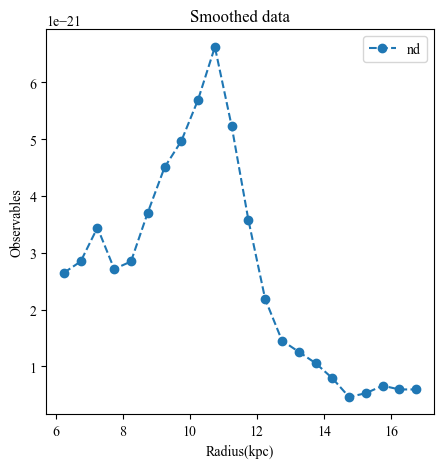

In [102]:
fig = plt.figure(figsize = (5,5))
#for x in interp_bin(data)[1:4]:
plt.plot(kpc_r, dat_sigmasfr, linestyle='--', marker='o', label = 'nd')

plt.title('Smoothed data')
plt.xlabel('Radius(kpc)')
plt.ylabel('Observables')
plt.legend()
#plt.savefig('eh')

In [103]:
dp = kpc_r.size

In [133]:
quantities = model_gen(model_no, let, ren, alphar)
quantities[-1]

3.03764964249563e-68*pi**(2/17)*m_**zeta*(T*gamma*k_B/(m_H*mu))**(3/2)*(G*Sigma_tot*\Sigma*mu/(T*gamma*k_B*zeta))**(19/17)/(E_51**(16/51)*G*Sigma_SFR*Sigma_tot*\delta)

In [134]:
scalreldata[-1]

array([6.64028041e+14, 6.41369564e+14, 5.36757974e+14, 7.15973623e+14,
       7.48229709e+14, 6.36312784e+14, 5.81248280e+14, 5.68374806e+14,
       5.20845455e+14, 4.60235089e+14, 5.88603837e+14, 8.65831066e+14,
       1.42240570e+15, 2.13724070e+15, 2.47496430e+15, 2.79122996e+15,
       3.43612520e+15, 5.16562944e+15, 3.79093360e+15, 2.50063010e+15,
       2.24325942e+15, 1.84746723e+15])

In [104]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\old files\libraries' )


from model_generator import  model_gen, bin_data
def analytical_data(model_no, let, ren, alphar, ca, rk, zip_data):
    quantities = model_gen(model_no, let, ren, alphar)

    const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
            (cl, 3/4), (xio, 0.4), (calpha, ca), (Rk, rk), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1), (kalpha, 1)]
    variables = [(sigmatot, 1), (sigma, 1),
                (sigmasfr, 1), (omega, 1), (q, 1), (T, 1)]

    # plotting the scaling relations
    observ = [sigmatot, sigma, sigmasfr, q, omega, T]

    for obs in observ:
        variables.remove((obs, 1))
    final = const + variables

    express = [quan.subs(final).simplify(force=True) for quan in quantities]

    scalreldata = []
    for exp in express:
        scalreldata.append([exp.evalf(subs={ sigmatot:sigt, sigma: sig, sigmasfr: sigsfr, q:qs, omega: oms, zet:zets, T:t}) for sigt,sig, sigsfr,qs, oms,zets, t in zip_data])
    scalreldata = np.array(scalreldata)
    scalreldata[6] = np.array(scalreldata[6])
    print(scalreldata[6])
    scalreldata[6] = scalreldata[6]*(np.float64(scalreldata[6]*scalreldata[6]>0))
    scalreldata = np.float64(scalreldata)

    return scalreldata

In [106]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis' )
#quantities = [ h, l, u, tau, biso, bani, Bbar, tanpb,tanpbm, nu, n, cs, alphak, Dk, Dc, omega*tau,  kalpha*h/(calpha*tau*u), alphak1, alphak2, alphak3,  taue, taur]

kms = 1e+5
#ax = plt.gca()
# for x in ['b']:
#     for z in np.linspace(2, 30, 5):
model_no = 3
let = 'a'
ren = False
alphar = 1
z = 10*np.ones(dp)#np.array([21.766188  , 18.50278424, 19.80991963, 19.52110812])
t = T_tb#1e+4*np.ones(dp)#np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])
ca = 1
rk = 0.3
data_pass = list(zip(dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega, z, t))

scalreldata = analytical_data(model_no, let, ren, alphar, ca, rk, data_pass)
    #     co = next(ax._get_lines.prop_cycler)['color']
    #     plt.scatter(kpc_r, scalreldata[2]/kms,color = co, marker='o', label = r'$u$ when $\zeta = $'+str(z),s = 10)

    # plt.axhline(y = scalreldata[11][0]/kms,color = 'g', linestyle = '-', label = r'$c_s$ at T = $10^4$K')
    # plt.plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')



    # plt.title(r'Variation of Zeta $zeta$')
    # plt.xlabel('Radius(kpc)')
    # plt.ylabel(r'$\tau$ (Myr)')
    # plt.legend()
    #plt.savefig('zeta'+x+'.jpg')

[6.91083179432208e-6*I 6.03078132185011e-6*I 5.42231333754034e-6*I
 4.10784420421642e-6*I 3.45991474504124e-6*I 3.27702711111867e-6*I
 3.04806455797058e-6*I 2.82995015804527e-6*I 2.72902166886996e-6*I
 2.58039330822297e-6*I 2.10436421502766e-6*I 1.60539595231455e-6*I
 1.16935657921413e-6*I 8.78138110338258e-7*I 7.31841915637357e-7*I
 6.20278113593597e-7*I 5.12572655739877e-7*I 3.85671824986652e-7*I
 3.96662753860929e-7*I 4.03160810377253e-7*I 3.44018612245166e-7*I
 3.07954508872542e-7*I]


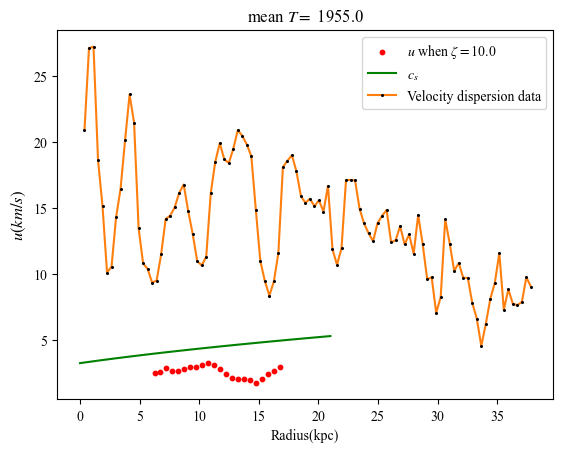

In [107]:
plt.scatter(kpc_r, scalreldata[2]/kms,color = 'r', marker='o', label = r'$u$ when $\zeta = $'+str(z.mean()),s = 10)

plt.plot(scalreldata[11]/kms,color = 'g', linestyle = '-', label = r'$c_s$')
plt.plot(kpc_radius, kms_dat_v_warp, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')


plt.title(r'mean $T = $ '+str(t.mean()))
plt.xlabel('Radius(kpc)')
plt.ylabel(r'$u(km/s)$', size='large')
plt.legend()
#plt.savefig('ss.png')

In [108]:
# ureg = []
# taureg = []
# alphareg = []
# for i , e in enumerate(kpc_r):
#     #supersonic or subsonic
#     if scalreldata[2][i] < scalreldata[11][i]:
#         let = 'a'
#         ureg.append(True)
#     else : 
#         let = 'b'
#         scalreldata[:, i] = analytical_data(model_no, 'b', ren, alphar, z, t, ca, rk)[:, i]
#         ureg.append(False)
#     #renovation or eddy
#     if scalreldata[-1][i] > scalreldata[-2][i]:
#         ren = False
#         taureg.append(ren)
#     else : 
#         ren = True
#         scalreldata[:, i] = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)[:, i]
#         taureg.append(ren)    

#     if  min(1, scalreldata[16][i])>= scalreldata[15][i]:
#         alphar = 1
#         alphareg.append(alphar)
#     elif min(scalreldata[15][i], scalreldata[16][i])>= 1:
#         alphar = 2
#         alphareg.append(alphar)
#     elif min(scalreldata[15][i], 1)>= scalreldata[16][i]:
#         alphar = 3
#         alphareg.append(alphar) 
#     scalreldata[:, i] = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)[:, i]

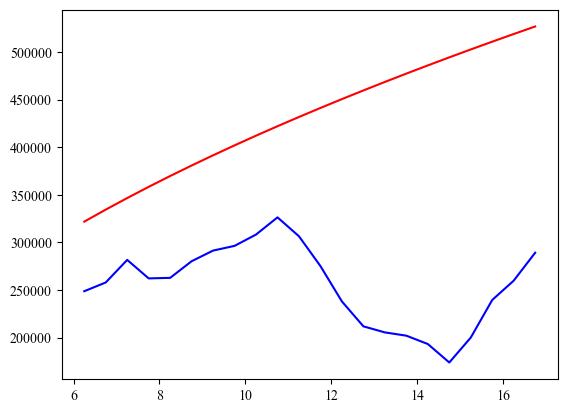

In [109]:
plt.plot(kpc_r, scalreldata[11], c ='r')
plt.plot(kpc_r, scalreldata[2], c ='b')
#plt.savefig('ss.png')

In [110]:
G_dat_Bord = np.array([4.9, 5.2, 4.9, 4.6])
G_dat_Breg = np.array([1.8, 2.1, 2.6, 2.7])
G_dat_Btot = np.array([7.3, 7.5, 7.1, 6.3])
RM_dat_po = np.array([30, 29, 26, 27, 27])* np.pi/180
err_RM_dat_po = np.array([5, 4, 3, 2, 3])* np.pi/180
rmdat_tanpo = np.tan(RM_dat_po)
rm_errdat_tanpo = 1/(np.cos(err_RM_dat_po))**2
mrange = np.array([(6.8+9.0)/2, (11.3+9.0)/2, (11.3+13.6)/2, (15.8+13.6)/2])

M_dat_pb = np.array([13, 19, 11, 8])* np.pi/180
err_M_dat_pb = np.array([4, 3, 3, 3])* np.pi/180
RM_dat_pb = np.array([4, 9, 7, 7, 5])* np.pi/180
err_RM_dat_pb = np.array([5, 3, 3, 2, 3])* np.pi/180
rmdat_tanpb = np.tan(RM_dat_pb)
rm_errdat_tanpb = 1/(np.cos(err_RM_dat_pb))**2
m_errdat_tanpb = 1/(np.cos(err_M_dat_pb))**2

rmrange = np.arange(7.5,12, 1)
kpc_dat_r = np.array([7, 9, 11, 13])

pc_dat_h = np.array([316.4, 371.9, 437.1, 513.7])


In [111]:
# from matplotlib.backends.backend_pdf import PdfPages

# # Instantiating pdf document
# z = 10*np.ones(dp)#np.array([21.766188  , 18.50278424, 19.80991963, 19.52110812])
# # t = 1e+4*np.ones(dp)#np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])
# l = [1e+4*np.ones(dp)]
# os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\plots')
# ca = 1
# rk  = 0.3
# PDF = PdfPages('new_exp.pdf')#('plots_model'+str(model_no)+let+'t_vary_'+'ca_'+str(ca)+'rk_'+str(rk)+'z_'+str(z.mean())+'.pdf')
# fig, ax = plt.subplots(nrows=2,ncols=len(l), figsize=(15, 15), tight_layout=True)

# for j ,t in enumerate(l):
# #co = next(ax._get_lines.prop_cycler)['color']
#     scalreldata = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)
#     i = 0
#     ax[i][j].scatter(kpc_r, scalreldata[2]/kms,color = 'r', marker='o', label = r'$u$ when $\zeta = $'+str(z.mean()),s = 10)

#     ax[i][j].axhline(y = scalreldata[11][0]/kms,color = 'g', linestyle = '-', label = r'$c_s$ at T = $10^4$K')
#     ax[i][j].plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')


#     ax[i][j].set_title(r'mean $T = $ '+str(t.mean()))
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'$u(km/s)$', size='large')
#     ax[i][j].legend()

#     i = 1
#     ax[i][j].plot(kpc_r, scalreldata[-5]/kms, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = r'regime 1 $\alpha_k = \frac{C_\alpha\tau^2u^2\Omega}{h}$')
#     ax[i][j].plot(kpc_r, scalreldata[-4]/kms, marker='o',markersize=1.2,c='tab:blue',mfc='k',mec='k', label =  r'regime 2 $\alpha_k = \frac{C_\alpha\tau u^2}{h}$')
#     ax[i][j].plot(kpc_r, scalreldata[-3]/kms, marker='o',markersize=1.2,c='tab:green',mfc='k',mec='k', label =  r'regime 3 $\alpha_k = K_\alpha u$')
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'$\alpha_k (km/s)$', size='large')
#     ax[i][j].legend()
# PDF.savefig(fig)

# fig, ax = plt.subplots(nrows=2,ncols=len(l), figsize=(15, 15), tight_layout=True)

# for j ,t in enumerate(l):
# #co = next(ax._get_lines.prop_cycler)['color']
#     scalreldata = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)
#     i = 0
#     ax[i][j].plot(kpc_r, scalreldata[-2]/(1e+6*365*24*60*60),c = 'b',markersize=1.2,linestyle='--', marker='o',mfc='k',mec='k', label = r'$\tau^e$')
#     ax[i][j].plot(kpc_r, scalreldata[-1]/(1e+6*365*24*60*60),c = 'g',markersize=1.2,linestyle='--', marker='o', mfc='k',mec='k',label = r'$\tau^r$')
#     ax[i][j].set_title(r'mean $T = $ '+str(t.mean()))
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'Variation of Correlation Time $\tau$ (Myr)', size='large')
#     ax[i][j].legend()

#     i = 1
#     ax[i][j].axhline(y = 1,color = 'g', linestyle = '-', label = r'1')
#     ax[i][j].plot(kpc_r, scalreldata[15], marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = r'$\Omega\tau$')
#     ax[i][j].plot(kpc_r, scalreldata[16], marker='o',markersize=1.2,c='tab:blue',mfc='k',mec='k', label = r'$\frac{K_\alpha h}{C_\alpha \tau u}$')
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'Checking the regime of $\alpha_k$', size='large')
#     ax[i][j].legend()
# PDF.savefig(fig)


# fig, ax = plt.subplots(nrows=2,ncols=len(l), figsize=(15, 15), tight_layout=True)
# for j ,t in enumerate(l):
#     scalreldata = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)
#     i = 0
#     ax[i][j].plot(kpc_r, scalreldata[0]/pcm,c = 'r',linestyle='--',mfc='k',mec='k', marker='o',label = r'Model results $h(pc)$')
#     ax[i][j].plot(kpc_dat_r, pc_dat_h,c = 'b',linestyle='--',mfc='k',mec='k', marker='o',label = r'Data from Chamandy et.al.(16) $h(pc)$')
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'Variation of Scale height $h$ (parsecs)')
#     i = 1
#     ax[i][j].plot(kpc_r, scalreldata[1]/kpcm,c = 'g',linestyle='--',mfc='k',mec='k', marker='o')
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel(r'Variation of Correlation Length $l$(kiloparsecs)')


    
# PDF.savefig(fig)

# fig, ax = plt.subplots(nrows=2,ncols=len(l), figsize=(15, 15), tight_layout=True)
# for j ,t in enumerate(l):
#     scalreldata = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)
#     pB = np.arctan(-scalreldata[7])
#     pbb = np.arctan(scalreldata[8])
#     pbo = np.arctan((scalreldata[6]*np.sin(pB) + scalreldata[5]*np.sin(pbb))/(2*((scalreldata[6]*np.cos(pB)) + scalreldata[5]*np.cos(pbb)))
#     + (np.abs(scalreldata[6]**2-scalreldata[5]**2)/(scalreldata[6]**2 + scalreldata[5]**2))*(scalreldata[6]*np.sin(pB) - scalreldata[5]*np.sin(pbb))/(2*((scalreldata[6]*np.cos(pB)) - scalreldata[5]*np.cos(pbb))))
#     i = 0
#     ax[i][j].errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=4, capsize=4, c = 'b',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(M)')
#     ax[i][j].errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = 180*err_RM_dat_pb/np.pi, ms=4, mew=4, capsize=4,c = 'y',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(RM)')
#     ax[i][j].errorbar(rmrange, 180*RM_dat_po/np.pi, yerr = 180*err_RM_dat_po/np.pi, ms=4, mew=4, capsize=4,c = 'r',linestyle='--', marker='o', label = r'Data $p_{o}$ (ordered field)(RM)')

#     ax[i][j].plot(kpc_r, 180*pB/np.pi,c = 'y',linestyle='-', marker='o',label = r'Model results $p_{B}$ (mean field)')
#     #ax[i][j].plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
#     ax[i][j].plot(kpc_r, 180*pbo/np.pi,c = 'r',linestyle='-', marker='o',label = r'Model results $p_{o}$ (ordered field)')

#     ax[i][j].set_title(r'mean $T = $ '+str(t.mean()))
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel('Polarisation Angle $p_{B}$ (degrees)')
#     ax[i][j].legend()
#     i = 1
#     G_scal_Bbartot = np.sqrt(scalreldata[4]**2 + scalreldata[5]**2 + scalreldata[6]**2)
#     G_scal_Bbarreg = scalreldata[6]
#     G_scal_Bbarord = np.sqrt(scalreldata[5]**2 + scalreldata[6]**2)
#     ax[i][j].plot(mrange, G_dat_Btot, c = 'b',linestyle='--', marker='o', label = 'Average Binned data $B_{tot}$ ($\mu G$)')
#     ax[i][j].plot(kpc_r, G_scal_Bbartot*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

#     ax[i][j].plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = 'Average Binned data $B_{reg}$ ($\mu G$)')
#     ax[i][j].plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg} = \bar{B}$')

#     ax[i][j].plot(mrange, G_dat_Bord, c = 'y',linestyle='--', marker='o', label = 'Average Binned data $B_{ord}$ ($\mu G$)')
#     ax[i][j].plot(kpc_r, G_scal_Bbarord*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')
#     ax[i][j].set_xlabel('Radius(kpc)')
#     ax[i][0].set_ylabel('Net Magnetic field ($\mu G$)')
#     ax[i][j].legend()
# PDF.savefig(fig)
# fig, ax = plt.subplots(nrows=1,ncols=len(l), figsize=(15, 15), tight_layout=True)
# for j ,t in enumerate(l):
#     scalreldata = analytical_data(model_no, let, ren, alphar, z, t, ca, rk)
#     G_scal_Bbartot = np.sqrt(scalreldata[4]**2 + scalreldata[5]**2 + scalreldata[6]**2)
#     G_scal_Bbarreg = scalreldata[6]
#     G_scal_Bbarord = np.sqrt(scalreldata[5]**2 + scalreldata[6]**2)
#     ax[j].plot(kpc_r, scalreldata[4]*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $b_{iso}$')

#     ax[j].plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = r'Average Binned data $\bar{B}$ ($\mu G$)')
#     ax[j].plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $\bar{B}$')

#     ax[j].plot(kpc_r, scalreldata[5]*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $b_{ani}$')
#     ax[j].set_xlabel('Radius(kpc)')
#     ax[0].set_ylabel('Magnetic field ($\mu G$)')
#     ax[j].legend()
# PDF.savefig(fig)
# PDF.close()


# #plt.savefig('Model'+str(model_no)+let+'f')
# #plt.savefig('ss_20')


In [112]:
ca = 2
rk = 0.3
z = 20*np.ones(dp)#np.array([21.766188  , 18.50278424, 19.80991963, 19.52110812])
t = 1e+4*np.ones(dp)#np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])
data_pass = list(zip(dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega, z, t))
scalreldata = analytical_data(model_no, let, ren, alphar, ca, rk, data_pass)

[6.30680085816115e-7 5.36973902123127e-7 4.82276945058122e-7
 4.96732000359875e-7 4.86549716255567e-7 4.39256300060646e-7
 3.96826844942630e-7 3.48660016713648e-7 2.77550872816420e-7
 2.31563100739479e-7 2.50999522119609e-7 2.80407843989273e-7
 2.98258886448248e-7 2.98729384329909e-7 2.89145562126709e-7
 2.75752579043934e-7 2.57994462435791e-7 2.38102173260250e-7
 2.21795314198906e-7 2.16377947655831e-7 2.17570837482456e-7
 2.14391117061737e-7]


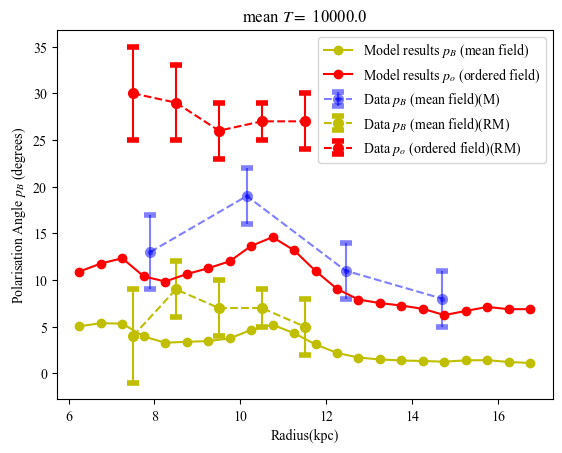

In [113]:

pB = np.arctan(-scalreldata[7])
pbb = np.arctan(scalreldata[8])
pbo = (1/2)*((1+(2*scalreldata[6]*scalreldata[5]*np.cos(pbb-pB))/(scalreldata[5]**2+scalreldata[6]**2))*np.arctan((scalreldata[6]*np.sin(pB) + scalreldata[5]*np.sin(pbb))/((scalreldata[6]*np.cos(pB)) + scalreldata[5]*np.cos(pbb)))
             +(1-(2*scalreldata[6]*scalreldata[5]*np.cos(pbb-pB))/(scalreldata[5]**2+scalreldata[6]**2))*np.arctan((scalreldata[6]*np.sin(pB) - scalreldata[5]*np.sin(pbb))/((scalreldata[6]*np.cos(pB)) - scalreldata[5]*np.cos(pbb))))

i = 0
plt.errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=4, capsize=4, c = 'b',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(M)', alpha = 0.5)
plt.errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = 180*err_RM_dat_pb/np.pi, ms=4, mew=4, capsize=4,c = 'y',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(RM)')
plt.errorbar(rmrange, 180*RM_dat_po/np.pi, yerr = 180*err_RM_dat_po/np.pi, ms=4, mew=4, capsize=4,c = 'r',linestyle='--', marker='o', label = r'Data $p_{o}$ (ordered field)(RM)')

plt.plot(kpc_r, 180*pB/np.pi,c = 'y',linestyle='-', marker='o',label = r'Model results $p_{B}$ (mean field)')
#plt.plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
plt.plot(kpc_r, 180*pbo/np.pi,c = 'r',linestyle='-', marker='o',label = r'Model results $p_{o}$ (ordered field)')

plt.title(r'mean $T = $ '+str(t.mean()))
plt.xlabel('Radius(kpc)')
plt.ylabel('Polarisation Angle $p_{B}$ (degrees)')
plt.legend()

In [114]:
scalreldata[13]/scalreldata[14]

array([ 3.9913394 ,  3.43619062,  3.10125453,  4.34606555,  4.94693587,
        4.19205916,  3.69386208,  3.17342072,  2.34785986,  1.95534811,
        2.5227368 ,  3.91567501,  6.44176453,  9.36405626, 10.95988654,
       12.19211428, 13.62574872, 16.75715696, 13.9202904 , 12.45493505,
       14.56822857, 15.50755026])

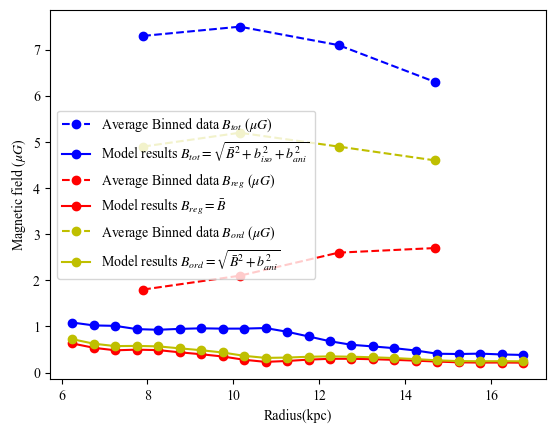

In [115]:
# plt.plot(kpc_r, scalreldata[4]*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $b_{iso}$')
# G_scal_Bbartot = np.sqrt(scalreldata[4]**2 + scalreldata[5]**2 + scalreldata[6]**2)
# G_scal_Bbarreg = scalreldata[6]
# G_scal_Bbarord = np.sqrt(scalreldata[5]**2 + scalreldata[6]**2)
# plt.plot(kpc_dat_r, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = 'Average Binned data $B_{reg}$ ($\mu G$)')

# plt.plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg} = \bar{B}$')

#plt.plot(kpc_r, scalreldata[5]*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $b_{ani}$')

G_scal_Bbartot = np.sqrt(scalreldata[4]**2 + scalreldata[5]**2 + scalreldata[6]**2)
G_scal_Bbarreg = scalreldata[6]
G_scal_Bbarord = np.sqrt(scalreldata[5]**2 + scalreldata[6]**2)
plt.plot(mrange, G_dat_Btot, c = 'b',linestyle='--', marker='o', label = 'Average Binned data $B_{tot}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbartot*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

plt.plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = 'Average Binned data $B_{reg}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg} = \bar{B}$')

plt.plot(mrange, G_dat_Bord, c = 'y',linestyle='--', marker='o', label = 'Average Binned data $B_{ord}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarord*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')

plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()

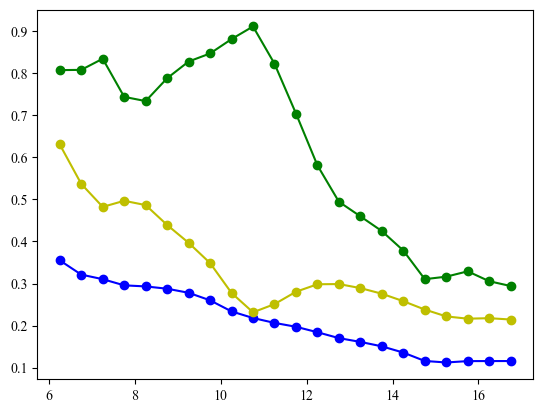

In [116]:
plt.plot(kpc_r, scalreldata[5]*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $b_{ani}$')
plt.plot(kpc_r, scalreldata[6]*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $b_{ani}$')
plt.plot(kpc_r, scalreldata[4]*1e+6,c = 'g',linestyle='-', marker='o',label = r'Model results $b_{ani}$')



In [117]:
scalreldata[6]

array([6.30680086e-07, 5.36973902e-07, 4.82276945e-07, 4.96732000e-07,
       4.86549716e-07, 4.39256300e-07, 3.96826845e-07, 3.48660017e-07,
       2.77550873e-07, 2.31563101e-07, 2.50999522e-07, 2.80407844e-07,
       2.98258886e-07, 2.98729384e-07, 2.89145562e-07, 2.75752579e-07,
       2.57994462e-07, 2.38102173e-07, 2.21795314e-07, 2.16377948e-07,
       2.17570837e-07, 2.14391117e-07])

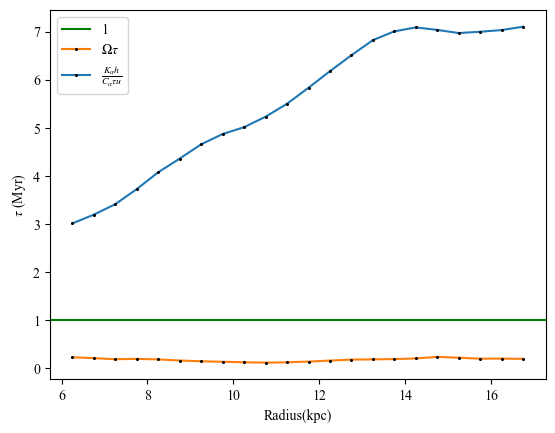

In [118]:
plt.axhline(y = 1,color = 'g', linestyle = '-', label = r'1')
plt.plot(kpc_r, scalreldata[15], marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = r'$\Omega\tau$')
plt.plot(kpc_r, scalreldata[16], marker='o',markersize=1.2,c='tab:blue',mfc='k',mec='k', label = r'$\frac{K_\alpha h}{C_\alpha \tau u}$')



plt.xlabel('Radius(kpc)')
plt.ylabel(r'$\tau$ (Myr)')
plt.legend()

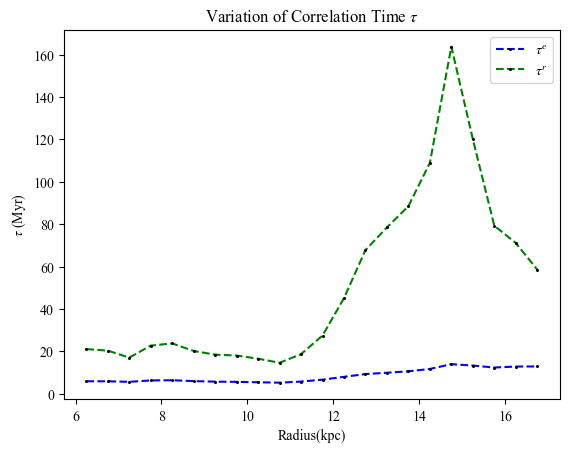

In [119]:
plt.plot(kpc_r, scalreldata[-2]/(1e+6*365*24*60*60),c = 'b',markersize=1.2,linestyle='--', marker='o',mfc='k',mec='k', label = r'$\tau^e$')
plt.plot(kpc_r, scalreldata[-1]/(1e+6*365*24*60*60),c = 'g',markersize=1.2,linestyle='--', marker='o', mfc='k',mec='k',label = r'$\tau^r$')
plt.title(r'Variation of Correlation Time $\tau$')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'$\tau$ (Myr)')
plt.legend()
#plt.savefig('cor_time'+ str(zetaval[0])+ str(model_no)+ let+ '.jpg')

In [120]:
scalreldata[-1]/(1e+6*365*24*60*60)

array([ 21.05619106,  20.33769545,  17.0204837 ,  22.70337464,
        23.72620842,  20.17734603,  18.43126206,  18.02304686,
        16.51590104,  14.59395892,  18.66450522,  27.45532301,
        45.10418882,  67.77145795,  78.48060319,  88.50932147,
       108.95881539, 163.80103498, 120.20971585,  79.29446017,
        71.1332896 ,  58.58280152])

## Full Expression

In [121]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
zet = Symbol('zeta')
kalpha = Symbol('K_alpha')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
h = Symbol('h')



# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


In [122]:
# a = u.subs({h:1})*h**(1/6)
# h3 = hs.subs({u:a})
# h3

In [123]:
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kms = 1e+5
rho = sigma/(2*h)
n = rho/((14/11)*mh)
lsn = 0.14*kpcm*(E51)**Fraction(16, 51) * (n/0.1)**Fraction(-19, 51)*(cs/(kms*10))**Fraction(-1, 3)
l = (3/10)*lsn
l = simplify(l)
nu = (delta*sigmasfr)/(2*h*mstar)
u = simplify(((4*pi/3)*l*lsn**3*cs**2*nu)**Fraction(1, 3))
hg = zet*(u**2 + cs**2)/(3*pi*G*sigmatot)
hsub = zet*(cs**2)/(3*pi*G*sigmatot)
hsup = zet*(u**2)/(3*pi*G*sigmatot)


In [124]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\old files\libraries' )
def exp_analytical_data(express, z, t, ca, rk):

    const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
            (cl, 3/4), (xio, 0.4), (calpha, ca), (Rk, rk), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1), (kalpha, 1)]
  
    express = express.subs(const).simplify(force=True) 

    zetaval = z
    opt_temp = t 
    exp = np.array([express.evalf(subs={ sigmatot:sigt, sigma: sig, sigmasfr: sigsfr, q:qs, omega: oms, zet:zets, T:t}) for sigt,sig, sigsfr,qs, oms,zets, t in zip(dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega,zetaval, opt_temp)])

    return exp

In [125]:
z = 7.5*np.ones(dp)#np.array([21.766188  , 18.50278424, 19.80991963, 19.52110812])
t = 1e+4*np.ones(dp)#np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])
ca = 1
rk = 0.3
h_val = exp_analytical_data(hg, z, t, ca, rk)
u_val = exp_analytical_data(u, z, t, ca, rk)
l_val = exp_analytical_data(l, z, t, ca, rk)

In [126]:
np.float64(diff(log(u_val[0]), h)*h)

0.16339869281045755

In [127]:
h_f = []
for hv in h_val:
    func = lambda x : np.array([np.float64((h-hv).evalf(subs={h : i})) for i in x])
    from scipy.optimize import fsolve
    h_initial_guess = 7e+25
    h_solution = fsolve(func, h_initial_guess)
    h_f.append(h_solution[0])
h_f = np.array(h_f)
l_f = np.array([np.float64( l_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])
u_f = np.array([np.float64( u_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])


In [129]:
Myr = 1e+6*(365*24*60*60)
taur = simplify(6.8*Myr*(1/4)*(nu*kpc**3*Myr/50)**(-1)*(E51)**Fraction(-16, 51) * (n/0.1)**Fraction(19, 17)*(cs/(kms*10)))


In [130]:
taur_val = exp_analytical_data(taur, z, t, ca, rk)
taur_f = np.array([np.float64( taur_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])


In [131]:
taur_f

array([2.14153050e+70, 2.06707793e+70, 1.72431200e+70, 2.30968680e+70,
       2.41527806e+70, 2.04969194e+70, 1.87023364e+70, 1.82860524e+70,
       1.67358547e+70, 1.47545058e+70, 1.89421734e+70, 2.80058944e+70,
       4.62455566e+70, 6.97079168e+70, 8.07933604e+70, 9.11666382e+70,
       1.12341515e+71, 1.69190009e+71, 1.23907376e+71, 8.14357459e+70,
       7.29118670e+70, 5.98604837e+70])

In [ ]:
h_val[0]

9663161546964.98*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.15718756554238e+20

In [ ]:
u_f/kms

array([4.52977582, 4.60312506, 4.95084446, 4.4995817 , 4.42853853,
       4.66103919, 4.78110039, 4.79316646, 4.92629942, 5.16329221,
       4.76321899, 4.19570783, 3.56234052, 3.12266468, 2.9934601 ,
       2.91126583, 2.75423682, 2.44832951, 2.79882685, 3.33933075,
       3.60084741, 3.99171481])

In [ ]:
# model_no = 3
# subso = analytical_data(model_no, 'a', False, 1, z, t, ca, rk)
# superso = analytical_data(model_no, 'b', False, 1, z, t, ca, rk)

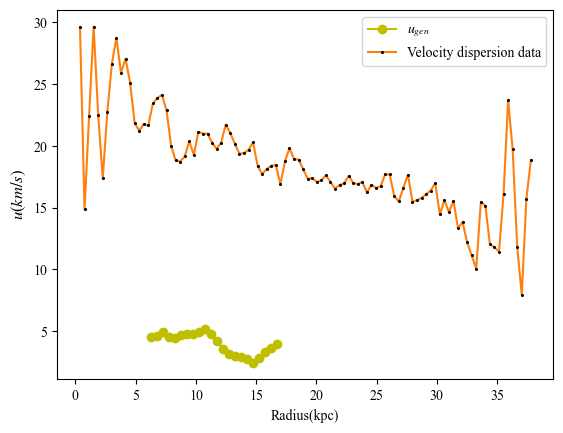

In [ ]:
plt.plot(kpc_r, u_f/kms,color = 'y', marker='o', label = r'$u_{gen}$')

#plt.plot(subso[11]/kms,color = 'g', linestyle = '-', label = r'$c_s$')
plt.plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'$u(km/s)$', size='large')
plt.legend()

NameError: name 'subso' is not defined

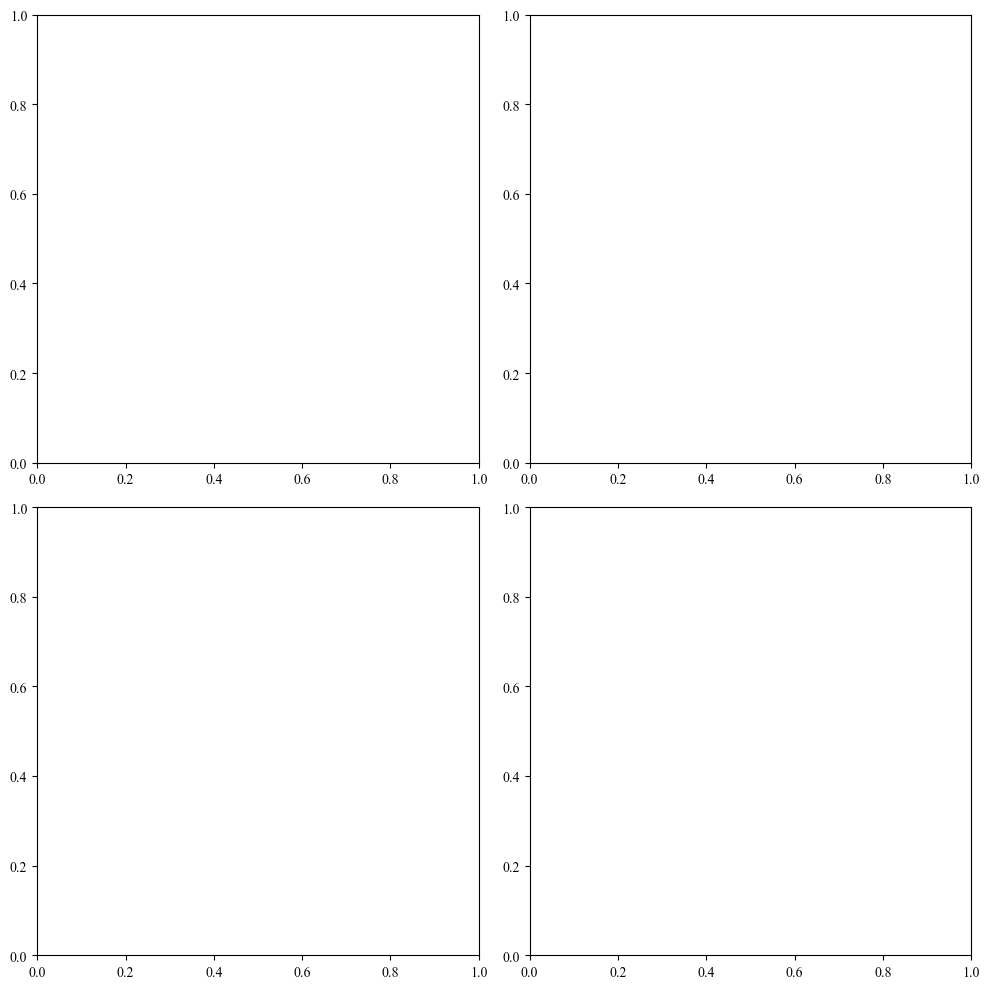

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), tight_layout=True)
i = 0
j = 0
ax[i][j].plot(kpc_r, subso[2]/kms,color = 'r', marker='^', label = r'$u_{sub}$ when $\zeta = $'+str(z.mean()))
ax[i][j].plot(kpc_r, superso[2]/kms,color = 'b', marker='o', label = r'$u_{sup}$')
ax[i][j].plot(kpc_r, u_f/kms,color = 'y', marker='o', label = r'$u_{gen}$')

#ax[i][j].plot(subso[11]/kms,color = 'g', linestyle = '-', label = r'$c_s$')
ax[i][j].plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$u(km/s)$', size='large')
ax[i][j].legend()

j = 1
ax[i][j].plot(kpc_r, subso[0]/pcm,c = 'r',linestyle='--',mfc='k',mec='k', marker='^',label = r'Model results subsonic $h(pc)$')
ax[i][j].plot(kpc_r, superso[0]/pcm,c = 'g',linestyle='--',mfc='k',mec='k', marker='o',label = r'Model results supersonic $h(pc)$')
ax[i][j].plot(kpc_r, h_f/pcm,c = 'y',linestyle='--',mfc='k',mec='k', marker='o',label = r'Root finding method general case $h(pc)$')
#ax[i][j].plot(kpc_dat_r, pc_dat_h,c = 'b',linestyle='--',mfc='k',mec='k', marker='o',label = r'Data from Chamandy et.al.(16) $h(pc)$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Variation of Scale height $h$ (parsecs)')
ax[i][j].legend()
i = 1
j = 0
ax[i][j].plot(kpc_r, subso[1]/kpcm,c = 'g',linestyle='--',mfc='k',mec='k', marker='o', label = 'Subsonic $l$')
ax[i][j].plot(kpc_r, superso[1]/kpcm,c = 'b',linestyle='--',mfc='k',mec='k', marker='o', label = 'Supersonic $l$')
ax[i][j].plot(kpc_r, l_f/kpcm,c = 'y',linestyle='--',mfc='k',mec='k', marker='o', label = 'Root Finding $l$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Variation of Correlation Length $l$(kiloparsecs)')
ax[i][j].legend()
j = 1
ax[i][j].plot(kpc_r, subso[-2]/(1e+6*365*24*60*60),c = 'b',markersize=1.2,linestyle='--', marker='o',mfc='k',mec='k', label = r'Subsonic $\tau^e$')
ax[i][j].plot(kpc_r, superso[-2]/(1e+6*365*24*60*60),c = 'g',markersize=1.2,linestyle='--', marker='o',mfc='k',mec='k', label = r'Supersonic $\tau^e$')
ax[i][j].plot(kpc_r, (l_f/u_f)/(1e+6*365*24*60*60),c = 'y',markersize=1.2,linestyle='--', marker='o',mfc='k',mec='k', label = r'Root Finding $\tau^e$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Variation of Correlation Time $\tau$ (Myr)', size='large')
ax[i][j].legend()

os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\plots')
#plt.savefig('t4_root')

In [ ]:
l_val

array([2126522432212.15/(1/h)**0.372549019607843,
       2230719533534.71/(1/h)**0.372549019607843,
       2099005232471.43/(1/h)**0.372549019607843,
       1823487285904.65/(1/h)**0.372549019607843,
       1570071376938.22/(1/h)**0.372549019607843,
       1444782148829.37/(1/h)**0.372549019607843,
       1504224056082.45/(1/h)**0.372549019607843,
       1608125155099.72/(1/h)**0.372549019607843,
       1654595000261.76/(1/h)**0.372549019607843,
       1551111379600.62/(1/h)**0.372549019607843,
       1414158627353.02/(1/h)**0.372549019607843,
       1407190979616.35/(1/h)**0.372549019607843,
       1481094758754.85/(1/h)**0.372549019607843,
       1520237838395.93/(1/h)**0.372549019607843,
       1533781687075.46/(1/h)**0.372549019607843,
       1585319652350.06/(1/h)**0.372549019607843,
       1618468974948.26/(1/h)**0.372549019607843,
       1689654881955.61/(1/h)**0.372549019607843,
       1800010714401.44/(1/h)**0.372549019607843,
       1919352991126.58/(1/h)**0.372549019607843,


In [ ]:
def scal_finder(hb, z, t):
    ca = 1
    rk = 0.3
    h_val = exp_analytical_data(hb, z, t, ca, rk)[0]
    u_val = exp_analytical_data(u, z, t, ca, rk)[0]
    func = lambda x : np.array([np.float64((h-h_val).evalf(subs={h : i})) for i in x])
    from scipy.optimize import fsolve
    print(h_val)
    h_initial_guess = 7e+25
    h_solution = fsolve(func, h_initial_guess)
    u_f = np.float64( u_val.evalf(subs={h : h_solution[0]})) 
    return u_f

In [ ]:
t = 1e+4*np.ones(dp)#np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])
zr = np.linspace(1,5000, 50)
ug = np.array([scal_finder(hg, z*np.ones(dp), t) for z in zr])
usup = np.array([scal_finder(hsup, z*np.ones(dp), t) for z in zr])
usub = np.array([scal_finder(hsub, z*np.ones(dp), t) for z in zr])

1494388669029.01*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.86144037417802e+19
153952530637927.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.94786755282666e+21
306410672606825.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 5.86712070191154e+21
458868814575723.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 8.78637385099643e+21
611326956544621.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 1.17056270000813e+22
763785098513519.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 1.46248801491662e+22
916243240482417.0*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 1.75441332982511e+22
1.06870138245131e+15*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.0463386447336e+22
1.22115952442021e+15*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.33826395964208e+22
1.37361766638911e+15*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 + 2.63018927455057e+22
1.52607580835801e+15*(1/(h*(1/h)**1.49019607843137))**0.666666666666667 +

c:\Users\WS7\anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


2.94786755282666e+21
5.86712070191154e+21
8.78637385099643e+21
1.17056270000813e+22
1.46248801491662e+22
1.75441332982511e+22
2.04633864473360e+22
2.33826395964208e+22
2.63018927455057e+22
2.92211458945906e+22
3.21403990436755e+22
3.50596521927604e+22
3.79789053418452e+22
4.08981584909301e+22
4.38174116400150e+22
4.67366647890999e+22
4.96559179381848e+22
5.25751710872697e+22
5.54944242363545e+22
5.84136773854394e+22
6.13329305345243e+22
6.42521836836092e+22
6.71714368326941e+22
7.00906899817789e+22
7.30099431308638e+22
7.59291962799487e+22
7.88484494290336e+22
8.17677025781185e+22
8.46869557272034e+22
8.76062088762882e+22
9.05254620253731e+22
9.34447151744580e+22
9.63639683235429e+22
9.92832214726278e+22
1.02202474621713e+23
1.05121727770798e+23
1.08040980919882e+23
1.10960234068967e+23
1.13879487218052e+23
1.16798740367137e+23
1.19717993516222e+23
1.22637246665307e+23
1.25556499814392e+23
1.28475752963477e+23
1.31395006112561e+23
1.34314259261646e+23
1.37233512410731e+23
1.40152765559

In [ ]:
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a*np.power(x, b)
pg, cov = curve_fit(f=power_law, xdata=zr, ydata=ug, p0=[0, 0], bounds=(-np.inf, np.inf))
psub, cov = curve_fit(f=power_law, xdata=zr, ydata=usub, p0=[0, 0], bounds=(-np.inf, np.inf))
psup, cov = curve_fit(f=power_law, xdata=zr, ydata=usup, p0=[0, 0], bounds=(-np.inf, np.inf))

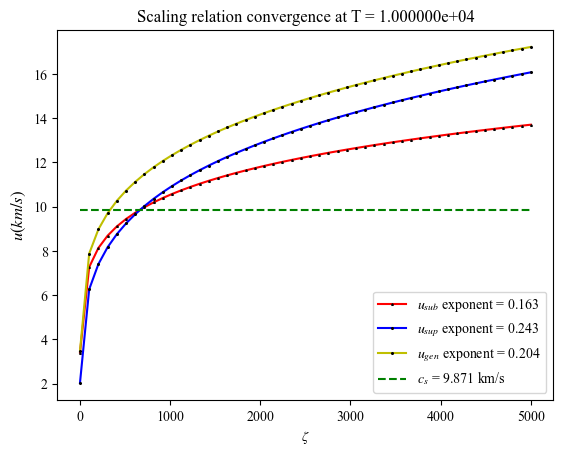

In [ ]:
plt.plot(zr, usub/kms,color = 'r', marker='^', linestyle='-',mfc='k',mec='k',markersize=1.2,label = r'$u_{sub}$ exponent = ' + str(round(psub[1],3)) )
plt.plot(zr,usup/kms,color = 'b', marker='o',linestyle='-',mfc='k',mec='k',markersize=1.2, label = r'$u_{sup}$ exponent = ' + str(round(psup[1],3)))
plt.plot(zr, ug/kms,color = 'y', marker='o',linestyle='-',mfc='k',mec='k',markersize=1.2, label = r'$u_{gen}$ exponent = ' + str(round(pg[1],3)))

plt.plot(zr, exp_analytical_data(cs, z, t, ca, rk)[0]*np.ones(len(zr))/kms,color = 'g', linestyle = '--', label = r'$c_s$ = '+ str(round(exp_analytical_data(cs, z, t, ca, rk)[0]/kms, 3))+' km/s')
#plt.plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$u(km/s)$', size='large')
plt.title('Scaling relation convergence at T = '+ "{:e}".format((round(t[0],2))))
plt.legend()
plt.savefig('t_'+str(t[0])+'.png')
plt.show()


In [ ]:
x, y, z = symbols('x y z')
expand_trig((1 + cos(x-y))*(sin(x)+sin(y))/(cos(x)+cos(y))+(1-cos(x-y))*(sin(x)-sin(y))/(cos(x)-cos(y)))

(sin(x) - sin(y))*(-sin(x)*sin(y) - cos(x)*cos(y) + 1)/(cos(x) - cos(y)) + (sin(x) + sin(y))*(sin(x)*sin(y) + cos(x)*cos(y) + 1)/(cos(x) + cos(y))